In [164]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import torch.nn.functional as F


In [165]:
husky_path='/kaggle/input/husky-vs-wolf/data/train/husky'
wolf_path='/kaggle/input/husky-vs-wolf/data/train/wolf'
husky_path1='//kaggle/input/data-without-background/data-background/train/husky'
wolf_path1='/kaggle/input/data-without-background/data-background/train/wolf'
data = {
    'image_path': [],
    'class': [],
}

data_without_background = {
    'image_path': [],
    'class': [],
}

for image_file in os.listdir(husky_path):
        data['image_path'].append(os.path.join(husky_path, image_file))
        data['class'].append('husky')
for image_file in os.listdir(wolf_path):
        data['image_path'].append(os.path.join(wolf_path, image_file))
        data['class'].append('wolf')
for image_file in os.listdir(husky_path1):
        data_without_background['image_path'].append(os.path.join(husky_path1, image_file))
        data_without_background['class'].append('husky')
for image_file in os.listdir(wolf_path1):
        data_without_background['image_path'].append(os.path.join(wolf_path1, image_file))
        data_without_background['class'].append('wolf')
df = pd.DataFrame(data)
df_without_background = pd.DataFrame(data_without_background)
print(df,df_without_background)


                                           image_path  class
0   /kaggle/input/husky-vs-wolf/data/train/husky/h...  husky
1   /kaggle/input/husky-vs-wolf/data/train/husky/h...  husky
2   /kaggle/input/husky-vs-wolf/data/train/husky/h...  husky
3   /kaggle/input/husky-vs-wolf/data/train/husky/h...  husky
4   /kaggle/input/husky-vs-wolf/data/train/husky/h...  husky
..                                                ...    ...
95  /kaggle/input/husky-vs-wolf/data/train/wolf/wo...   wolf
96  /kaggle/input/husky-vs-wolf/data/train/wolf/wo...   wolf
97  /kaggle/input/husky-vs-wolf/data/train/wolf/wo...   wolf
98  /kaggle/input/husky-vs-wolf/data/train/wolf/wo...   wolf
99  /kaggle/input/husky-vs-wolf/data/train/wolf/wo...   wolf

[100 rows x 2 columns]                                            image_path  class
0   //kaggle/input/data-without-background/data-ba...  husky
1   //kaggle/input/data-without-background/data-ba...  husky
2   //kaggle/input/data-without-background/data-ba...  husky


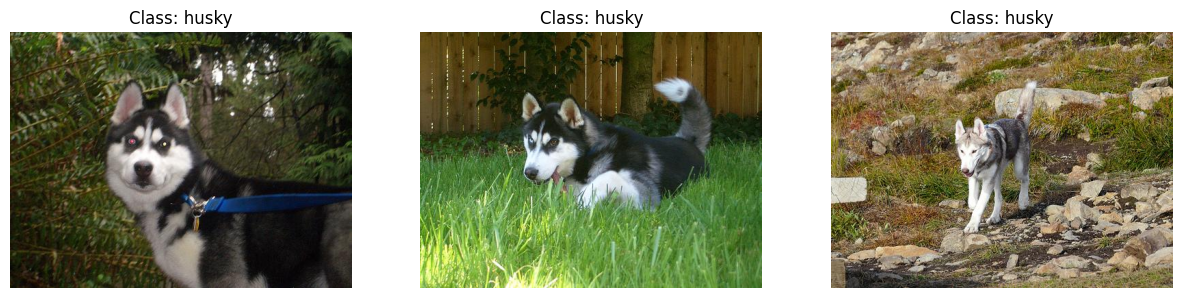

In [166]:
samples = df.sample(3)
samples_without_background=df_without_background.sample(3)
# Plot the 3 images with their class labels
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, (idx, row) in enumerate(samples.iterrows()):
    img = mpimg.imread(row['image_path'])
    axes[i].imshow(img)
    axes[i].set_title(f"Class: {row['class']}")
    axes[i].axis('off')  # Hide axis

plt.show()


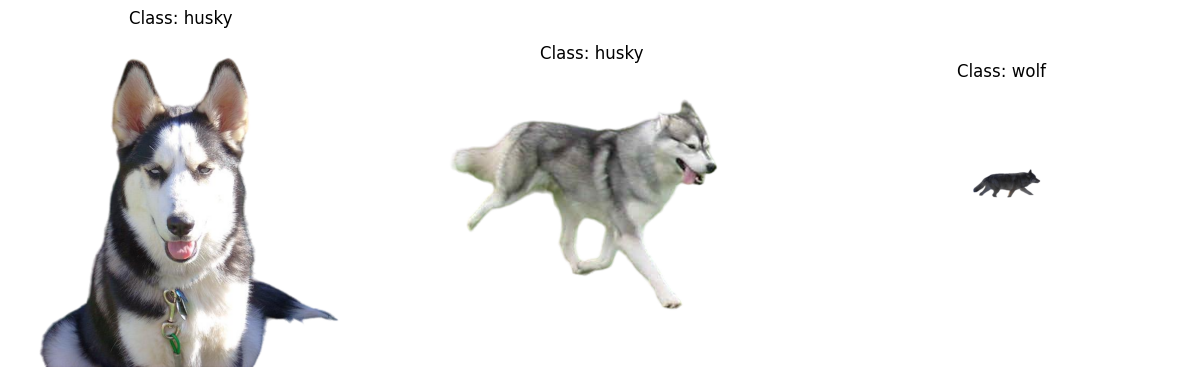

In [167]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, (idx, row) in enumerate(samples_without_background.iterrows()):
    img = mpimg.imread(row['image_path'])
    axes[i].imshow(img)
    axes[i].set_title(f"Class: {row['class']}")
    axes[i].axis('off')  # Hide axis

plt.show()

In [168]:
# import shutil

# # Path to the folder you want to delete
# folder_path = '/kaggle/working/data'

# # Delete the folder and all its contents
# shutil.rmtree(folder_path)

In [169]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# def remove_background(image_path):
#     # Read the image
#     img = cv2.imread(image_path)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB

#     # Create an initial mask (all zeroes)
#     mask = np.zeros(img.shape[:2], np.uint8)

#     # Create temporary arrays for grabCut (used internally)
#     bgd_model = np.zeros((1, 65), np.float64)
#     fgd_model = np.zeros((1, 65), np.float64)

#     # Define a rectangle around the object (adjust this for better results)
#     height, width = img.shape[:2]
#     rect = (10, 10, width - 10, height - 10)  # (x, y, w, h)

#     # Apply grabCut algorithm
#     cv2.grabCut(img, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

#     # Modify the mask to set sure foreground and sure background
#     mask_2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

#     # Apply the mask on the image to extract the foreground
#     img_foreground = img * mask_2[:, :, np.newaxis]

#     # Create a white background and overlay the foreground on it
#     background = np.ones_like(img) * 255
#     result = np.where(img_foreground == 0, background, img_foreground)

#     return result
# i=0
# for image in data['image_path']:
# #     image_path = "/kaggle/input/husky-vs-wolf/data/train/husky/husky_8.jpeg"
#     image_path=image
#     output_husky_path='/kaggle/working/data/train/husky'
#     output_wolf_path='/kaggle/working/data/train/wolf'
#     os.makedirs(output_husky_path, exist_ok=True)
#     os.makedirs(output_wolf_path, exist_ok=True)
    
#     result = remove_background(image_path)
#     if(data['class'][i]=='husky'):
#         print("husky")
#         cv2.imwrite(os.path.join(output_husky_path, image), result)
#     else:
#         print("wolf")
#         cv2.imwrite(os.path.join(output_wolf_path, image), result)
#     i=i+1
# #     # Plot the original and background-removed images side-by-side
# #     fig, ax = plt.subplots(1, 2, figsize=(12, 6))
# #     ax[0].imshow(cv2.imread(image_path)[:, :, ::-1])
# #     ax[0].set_title("Original Image")
# #     ax[0].axis('off')

# #     ax[1].imshow(result)
# #     ax[1].set_title("Image with Background Removed")
# #     ax[1].axis('off')

# #     plt.show()
# print(i)


In [170]:
# Convert class labels to numeric (husky -> 0, wolf -> 1)
df['class'] = df['class'].apply(lambda x: 0 if x == 'husky' else 1)
df_without_background['class'] = df_without_background['class'].apply(lambda x: 0 if x == 'husky' else 1)
# Split the data into train and test sets
train_df, test_df = train_test_split(df, test_size=0.1, random_state=42, stratify=df['class'])

print(f"Train size: {len(train_df)}, Test size: {len(test_df)}")


Train size: 90, Test size: 10


In [171]:
class AnimalDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx, 0]
        label = self.dataframe.iloc[idx, 1]

        # Load image and convert it to RGB
        image = Image.open(img_path).convert("RGB")

        # Apply transformations (if any)
        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label, dtype=torch.long)


In [172]:
from torchvision import transforms

class Replace255With0:
    def __call__(self, tensor):
        tensor[tensor == 1.0] = 0.0  # In PyTorch, 255 is scaled to 1.0
        return tensor
    
    
# Training transforms with more augmentation
train_transform_with_background = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(12),
#     transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
#     transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ToTensor(),
#     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_transform_without_background = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    Replace255With0(),
#     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Test transforms without augmentation
test_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
#     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


# Datasets and DataLoaders
train_dataset = AnimalDataset(train_df, transform=train_transform_with_background)
train_dataset_without_background = AnimalDataset(df_without_background, transform=train_transform_without_background)
test_dataset = AnimalDataset(test_df, transform=test_transform)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
train_loader_without_background = DataLoader(train_dataset_without_background, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


Images shape: torch.Size([16, 3, 256, 256])
Labels: tensor([1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0])


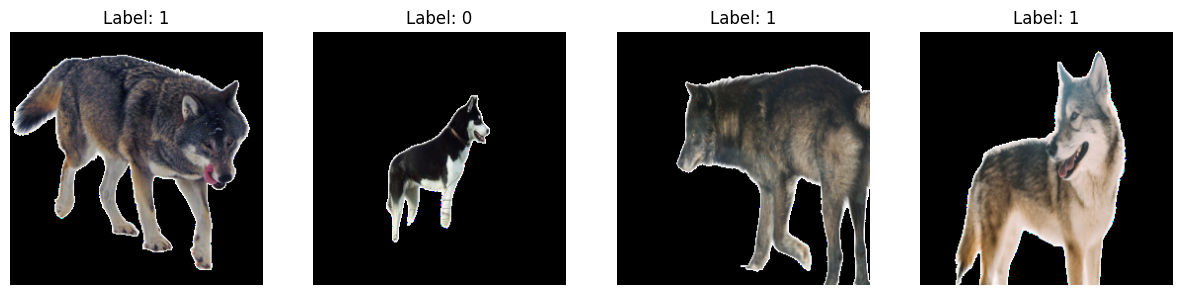

In [173]:
import torch
from torchvision import datasets
from torch.utils.data import DataLoader


# Function to display a batch of images and labels from the dataloader
def show_batch(loader):
    data_iter = iter(loader)  # Create an iterator
    images, labels = next(data_iter)  # Get the first batch
    print(f"Images shape: {images.shape}")  # E.g., torch.Size([4, 3, 256, 256])
    print(f"Labels: {labels}")  # Print the corresponding labels
    
    # Optionally display the images (requires matplotlib)
    import matplotlib.pyplot as plt
    grid_img = torch.permute(images, (0, 2, 3, 1))  # Move channels to last dimension
    fig, axes = plt.subplots(1, 4, figsize=(15, 5))
    
    for i, ax in enumerate(axes):
        ax.imshow(grid_img[i])
        ax.set_title(f"Label: {labels[i]}")
        ax.axis('off')
    
    plt.show()

# Display a batch
show_batch(train_loader_without_background)


In [174]:
import torch.nn as nn
import torch.nn.functional as F

class ImprovedCNN(nn.Module):
    def __init__(self):
        super(ImprovedCNN, self).__init__()
        # Block 1: Conv -> BatchNorm -> ReLU -> Pool
        self.conv1 = nn.Conv2d(3, 128, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(128)
        self.pool = nn.MaxPool2d(2, 2)

        # Block 2: Conv -> BatchNorm -> ReLU -> Pool
        self.conv2 = nn.Conv2d(128, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)

        # Block 3: Conv -> BatchNorm -> ReLU -> Pool
        self.conv3 = nn.Conv2d(64, 32, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(32)

        # Global Adaptive Pooling to avoid hardcoding dimensions
        self.adaptive_pool = nn.AdaptiveAvgPool2d((1, 1))

        # Fully connected layers
        self.fc1 = nn.Linear(32, 16)
#         self.dropout = nn.Dropout(0.5)  # Dropout to reduce overfitting
        self.fc2 = nn.Linear(16, 2)  # Binary classification (husky vs. wolf)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))

        # Apply global adaptive pooling
        x = self.adaptive_pool(x)
        x = x.view(x.size(0), -1)  # Flatten

        # Fully connected layers with dropout
        x = F.relu(self.fc1(x))
#         x = self.dropout(x)
        x = self.fc2(x)
        return x

model = ImprovedCNN()
print(model)


ImprovedCNN(
  (conv1): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (adaptive_pool): AdaptiveAvgPool2d(output_size=(1, 1))
  (fc1): Linear(in_features=32, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=2, bias=True)
)


In [175]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()  # Binary classification loss
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [178]:
from itertools import zip_longest
def train(model, train_loader, train_loader_without_background,criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        for (data1, labels1), (data2, labels2) in zip_longest(train_loader, train_loader_without_background):
            # Combine batches manually
            images = torch.cat([data1, data2], dim=0)  # Concatenate along batch dimension
            labels = torch.cat([labels1, labels2], dim=0)
            optimizer.zero_grad()

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            
            # Calculate accuracy
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        epoch_loss = running_loss / len(train_loader)
        epoch_acc = 100 * correct / total
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%")

train(model, train_loader, train_loader_without_background,criterion, optimizer, epochs=20)


Epoch [1/20], Loss: 0.6245, Accuracy: 61.62%
Epoch [2/20], Loss: 0.5579, Accuracy: 70.27%
Epoch [3/20], Loss: 0.5424, Accuracy: 68.11%
Epoch [4/20], Loss: 0.5300, Accuracy: 69.19%
Epoch [5/20], Loss: 0.4997, Accuracy: 78.38%
Epoch [6/20], Loss: 0.4862, Accuracy: 78.92%
Epoch [7/20], Loss: 0.4760, Accuracy: 77.84%
Epoch [8/20], Loss: 0.4822, Accuracy: 76.76%
Epoch [9/20], Loss: 0.4379, Accuracy: 84.32%
Epoch [10/20], Loss: 0.4367, Accuracy: 79.46%
Epoch [11/20], Loss: 0.4222, Accuracy: 82.16%
Epoch [12/20], Loss: 0.4207, Accuracy: 79.46%
Epoch [13/20], Loss: 0.3963, Accuracy: 80.54%
Epoch [14/20], Loss: 0.3627, Accuracy: 86.49%
Epoch [15/20], Loss: 0.3614, Accuracy: 84.32%
Epoch [16/20], Loss: 0.3739, Accuracy: 84.86%
Epoch [17/20], Loss: 0.3535, Accuracy: 87.03%
Epoch [18/20], Loss: 0.3582, Accuracy: 85.41%
Epoch [19/20], Loss: 0.3173, Accuracy: 87.03%
Epoch [20/20], Loss: 0.3412, Accuracy: 82.16%


In [ ]:
# def train(model, train_loader_without_background, criterion, optimizer, epochs=10):
#     model.train()
#     for epoch in range(epochs):
#         running_loss = 0.0
#         correct = 0
#         total = 0

#         for images, labels in train_loader:
#             optimizer.zero_grad()

#             # Forward pass
#             outputs = model(images)
#             loss = criterion(outputs, labels)

#             # Backward pass and optimization
#             loss.backward()
#             optimizer.step()

#             running_loss += loss.item()
            
#             # Calculate accuracy
#             _, preds = torch.max(outputs, 1)
#             correct += (preds == labels).sum().item()
#             total += labels.size(0)

#         epoch_loss = running_loss / len(train_loader)
#         epoch_acc = 100 * correct / total
#         print(f"Epoch [{epoch + 1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%")

# train(model, train_loader, criterion, optimizer, epochs=10)


In [179]:
def evaluate(model, test_loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')

evaluate(model, test_loader)


Test Accuracy: 90.00%


Prediction: Husky


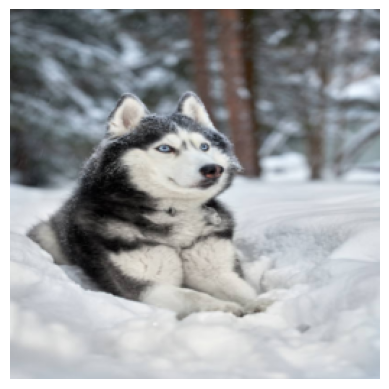

In [199]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load a test image
test = '/kaggle/input/husky-test/husky_snow.jpg'

# Define the test transformation
test_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    # Uncomment normalization if it was applied during training
    # transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Open the image and apply transformations
image = Image.open(test).convert("RGB")
transformed_image = test_transform(image)

# Add a batch dimension to the image tensor
input_image = transformed_image.unsqueeze(0)  # Shape: [1, 3, 256, 256]

# Forward pass through the model
model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # Disable gradient computation for inference
    outputs = model(input_image)
    _, preds = torch.max(outputs, 1)

# Display the prediction
if preds.item() == 0:
    print('Prediction: Husky')
else:
    print('Prediction: Wolf')

# Convert the tensor back to a NumPy array for display
image_np = transformed_image.permute(1, 2, 0).numpy()  # [H, W, C]

# Plot the image
plt.imshow(image_np)
plt.axis('off')  # Turn off axis
plt.show()


In [ ]:
import torch

# Assuming your model is called 'model'
torch.save(model.state_dict(), '/kaggle/working/model1.pth')


In [ ]:
from IPython.display import FileLink

# Assuming the model is saved as '/kaggle/working/model.pth'
display(FileLink('/kaggle/working/model1.pth'))
